# Study Habits and Activites of Students

## Base Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Overview

In [2]:
df = pd.read_csv('data/student_lifestyle_dataset.csv')

In [3]:
df.head()

,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
0,1,6.9,3.8,8.7,2.8,1.8,2.99,Moderate
1,2,5.3,3.5,8.0,4.2,3.0,2.75,Low
2,3,5.1,3.9,9.2,1.2,4.6,2.67,Low
3,4,6.5,2.1,7.2,1.7,6.5,2.88,Moderate
4,5,8.1,0.6,6.5,2.2,6.6,3.51,High


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Student_ID                       2000 non-null   int64  
 1   Study_Hours_Per_Day              2000 non-null   float64
 2   Extracurricular_Hours_Per_Day    2000 non-null   float64
 3   Sleep_Hours_Per_Day              2000 non-null   float64
 4   Social_Hours_Per_Day             2000 non-null   float64
 5   Physical_Activity_Hours_Per_Day  2000 non-null   float64
 6   GPA                              2000 non-null   float64
 7   Stress_Level                     2000 non-null   object 
dtypes: float64(6), int64(1), object(1)
memory usage: 125.1+ KB


In [5]:
df.describe()

,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000
mean,1000.500000,7.475800,1.990100,7.501250,2.704550,4.32830,3.115960
std,577.494589,1.423888,1.155855,1.460949,1.688514,2.51411,0.298674
min,1.000000,5.000000,0.000000,5.000000,0.000000,0.00000,2.240000
25%,500.750000,6.300000,1.000000,6.200000,1.200000,2.40000,2.900000
50%,1000.500000,7.400000,2.000000,7.500000,2.600000,4.10000,3.110000
75%,1500.250000,8.700000,3.000000,8.800000,4.100000,6.10000,3.330000
max,2000.000000,10.000000,4.000000,10.000000,6.000000,13.00000,4.000000


In [6]:
df.describe(include='O')

,Stress_Level
count,2000
unique,3
top,High
freq,1029


In [7]:
df.isna().sum()

Student_ID                         0
Study_Hours_Per_Day                0
Extracurricular_Hours_Per_Day      0
Sleep_Hours_Per_Day                0
Social_Hours_Per_Day               0
Physical_Activity_Hours_Per_Day    0
GPA                                0
Stress_Level                       0
dtype: int64

We can see in the above lines that we have 2000 rows of different students, along with their study hours, Extracurricular hourse, Sleep hours, Social hours, and Physical activity hours per day. This also has the target variables of GPA (regression) and Stress Level (classification).

We can see that there is no missing data in this dataset, but we should check for any outliers that may affect our models. 

## Data Processing

In [8]:
def hist_mean_median(column):
    print(df[column].agg(['mean', 'median', 'max', 'min']))
    fig, axes = plt.subplots(2,1, figsize=(12, 6))
    sns.histplot(data=df, x=column, kde=True, ax=axes[0])
    axes[0].axvline(x=df[column].mean(), color='red', label='Mean')
    axes[0].axvline(x=df[column].median(), color='green', label='Median')
    sns.boxplot(data=df, x=column, ax=axes[1])
    axes[0].legend()

In [9]:
df.columns

Index(['Student_ID', 'Study_Hours_Per_Day', 'Extracurricular_Hours_Per_Day',
       'Sleep_Hours_Per_Day', 'Social_Hours_Per_Day',
       'Physical_Activity_Hours_Per_Day', 'GPA', 'Stress_Level'],
      dtype='object')

I am going to rename the column names, as they are all in hours per day, so I remove the "per_day" portion from them

In [10]:
df.rename(columns={
    'Study_Hours_Per_Day': 'Study_Hours', 'Extracurricular_Hours_Per_Day': 'Extracurricular_Hours',
       'Sleep_Hours_Per_Day': 'Sleep_Hours', 'Social_Hours_Per_Day': 'Social_Hours',
       'Physical_Activity_Hours_Per_Day': 'Physical_Activity_Hours'
}, inplace=True)

In [11]:
df['Stress_Level'] = pd.Categorical(df['Stress_Level'], ordered=True, categories=['Low', 'Moderate', 'High'])

### Study Hours

mean       7.4758
median     7.4000
max       10.0000
min        5.0000
Name: Study_Hours, dtype: float64


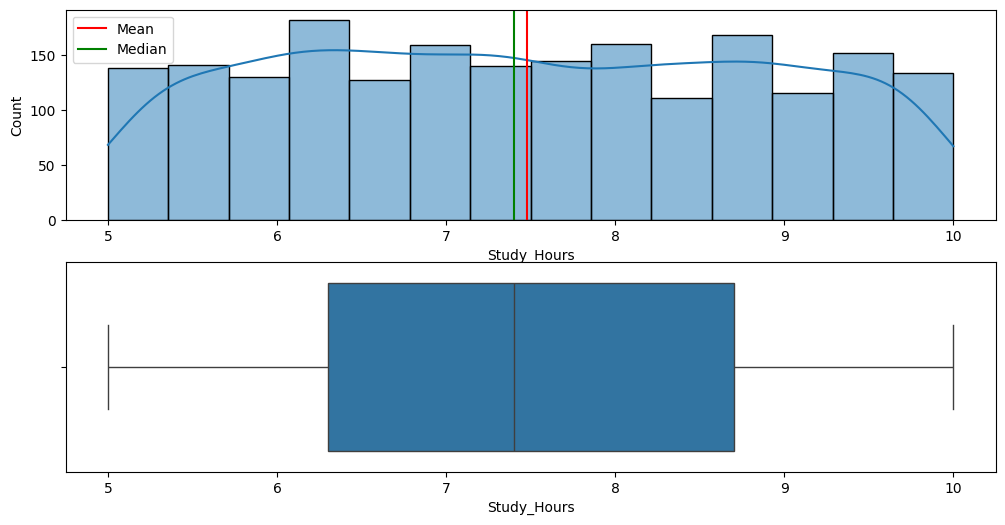

In [12]:
hist_mean_median('Study_Hours')

> We can see in the above histogram and boxplot, the median study hours is around 7.4 per day, while the mean study hours is 7.5 hours. The student(s) who study the most dedicate 10 hours a day, while the students who study the least contribute 5 hours a day

### Extracurricular Hours 

mean      1.9901
median    2.0000
max       4.0000
min       0.0000
Name: Extracurricular_Hours, dtype: float64


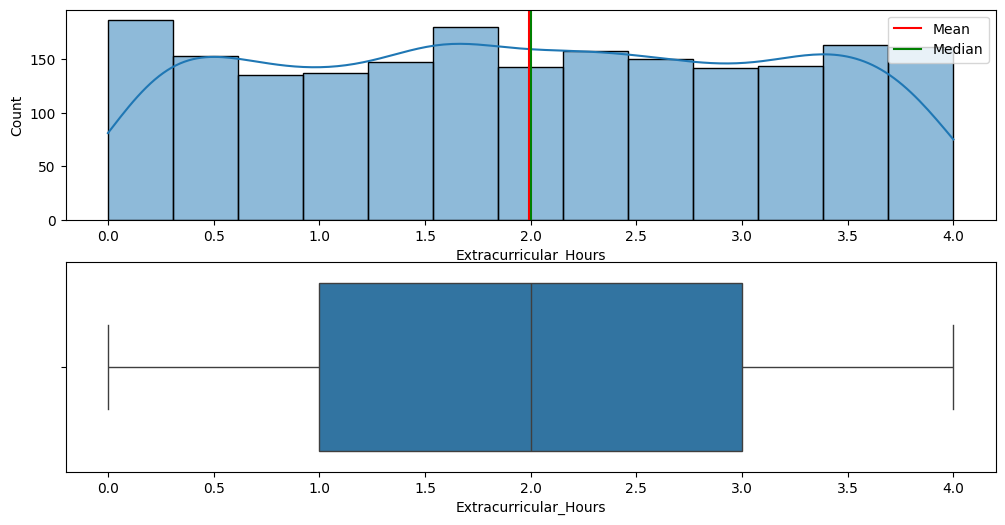

In [13]:
hist_mean_median('Extracurricular_Hours')

> The above graphs show the distribution of extracurricular hours per day, and we can see on average, it is apprximately 2 hours a day. The most student(s) contribute is 4, and the least is 0. 

### Sleep Hours

mean       7.50125
median     7.50000
max       10.00000
min        5.00000
Name: Sleep_Hours, dtype: float64


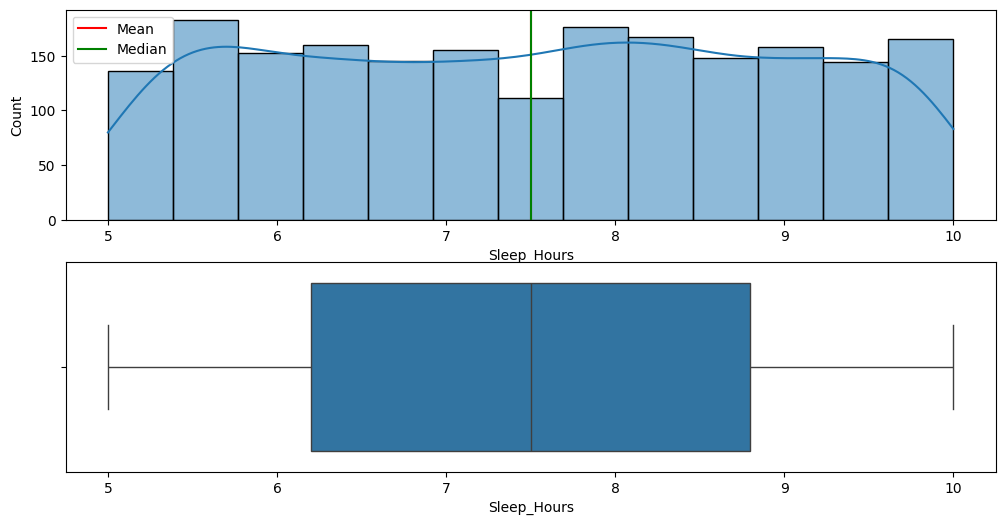

In [14]:
hist_mean_median('Sleep_Hours')

> In the above plot and outputs, we can see that the mean and median sleep hours is around 7.5 (the mean is 7.50125, but we will round to 7.5). The students who sleep the least sleep only 5 hours, and the students who sleep the most sleep 10 hours. The recommended sleep hours is at least 8 hours a night for teenagers, so there are alot of students who are not getting this. 

### Social Hours

mean      2.70455
median    2.60000
max       6.00000
min       0.00000
Name: Social_Hours, dtype: float64


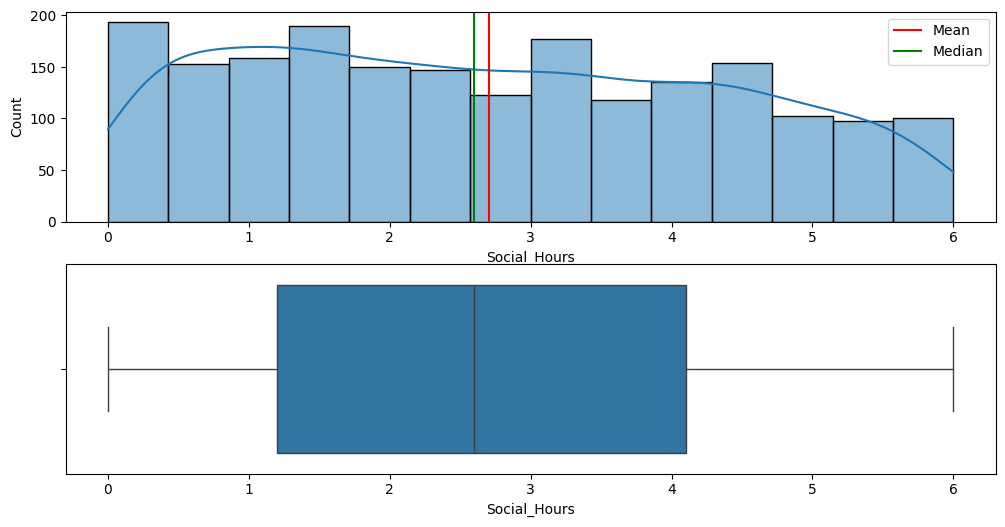

In [15]:
hist_mean_median('Social_Hours')

> The above plots describe the amount of hours per day the student is social, so the time spent with friends, family, etc. Most students are only social ~2 hours a day. The recommended amount of social interaction is 1-3 hours per day (https://www.socialconnectionguidelines.org/en/evidence-briefs/how-much-social-time-do-we-need)

### Physical Activity Hours

mean       4.3283
median     4.1000
max       13.0000
min        0.0000
Name: Physical_Activity_Hours, dtype: float64


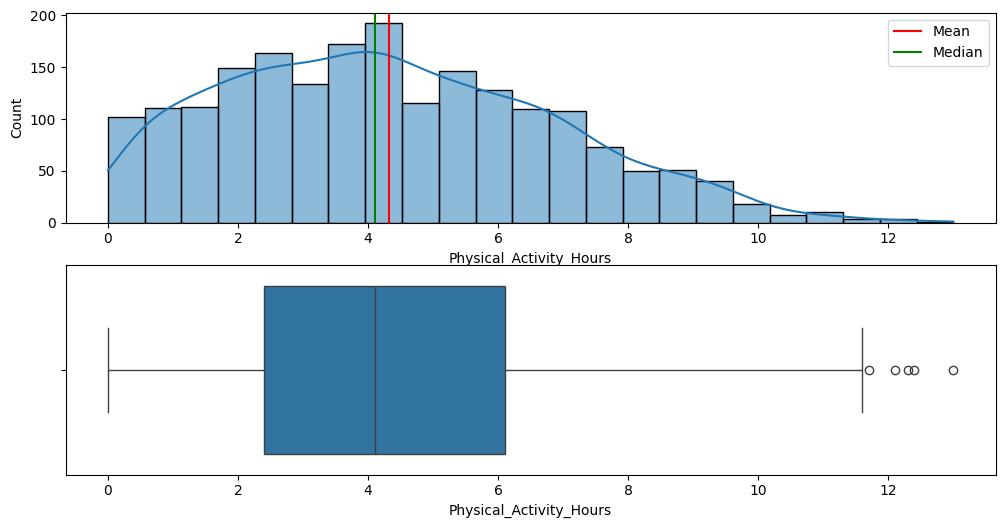

In [16]:
hist_mean_median('Physical_Activity_Hours')

> This is a chart showing the distribution of Physical Activity per day  hours among students. There are a few outliers going about 10 hours per day, and these may be althletes. I will need to determine if their presence will improve my model, or hurt my model. 

### GPA

mean      3.11596
median    3.11000
max       4.00000
min       2.24000
Name: GPA, dtype: float64


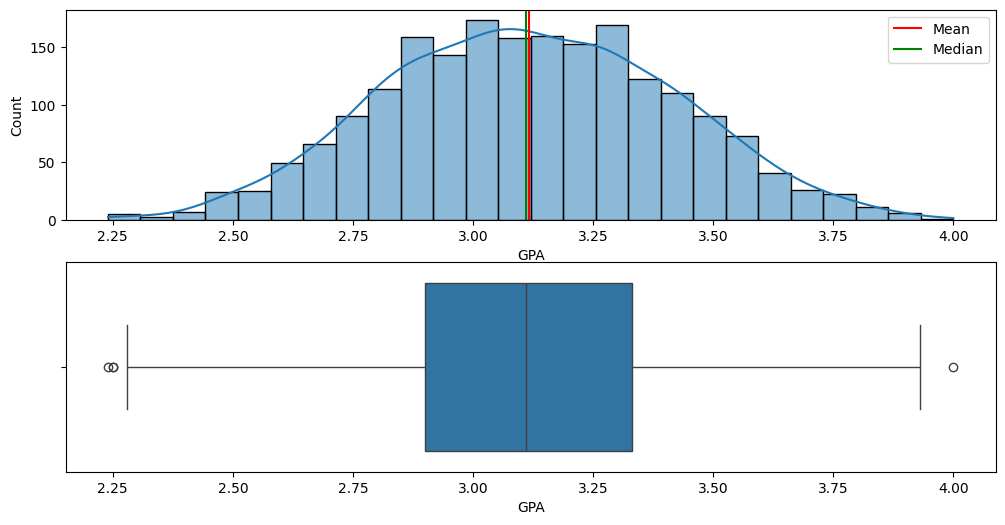

In [17]:
hist_mean_median('GPA')

> This is the distribution of GPA, which will be one of my target variables. This follows a normal distribution, with the average GPA being 3.11. The highest GPA achievable is 4.0, and the lowest GPA in this dataset is 2.24.
>
> Although there are outliers, there are only a few. Some very high GPA, and some very low GPAs. As this will be one of my target variables, I will not remove the outliers. 

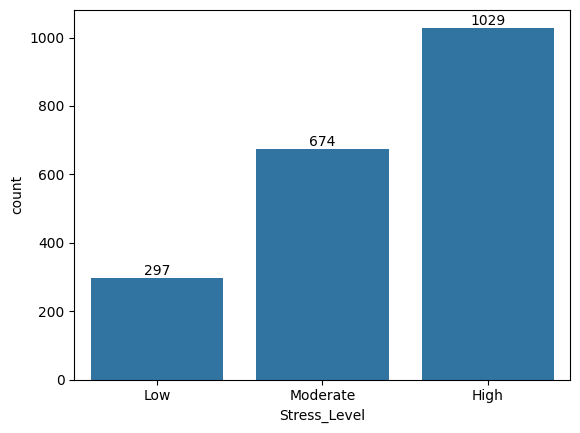

In [18]:
ax= sns.countplot(data=df, x='Stress_Level')
ax.bar_label(ax.containers[0]);

Find the relation between GPA, Stress_LEvel, and the hours of the day. 
Need to show the relation in laymen's terms. 
Come up with questions to make subsets. 

> This is a count plot of the different stress levels, which will be my secondary target variable. Most students seem to have a high level of stress, with over half the dataset being high stress. 

## Exploratory Data Analysis

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 [Text(0.5, 0, 'Student_ID'),
  Text(1.5, 0, 'Study_Hours'),
  Text(2.5, 0, 'Extracurricular_Hours'),
  Text(3.5, 0, 'Sleep_Hours'),
  Text(4.5, 0, 'Social_Hours'),
  Text(5.5, 0, 'Physical_Activity_Hours'),
  Text(6.5, 0, 'GPA')])

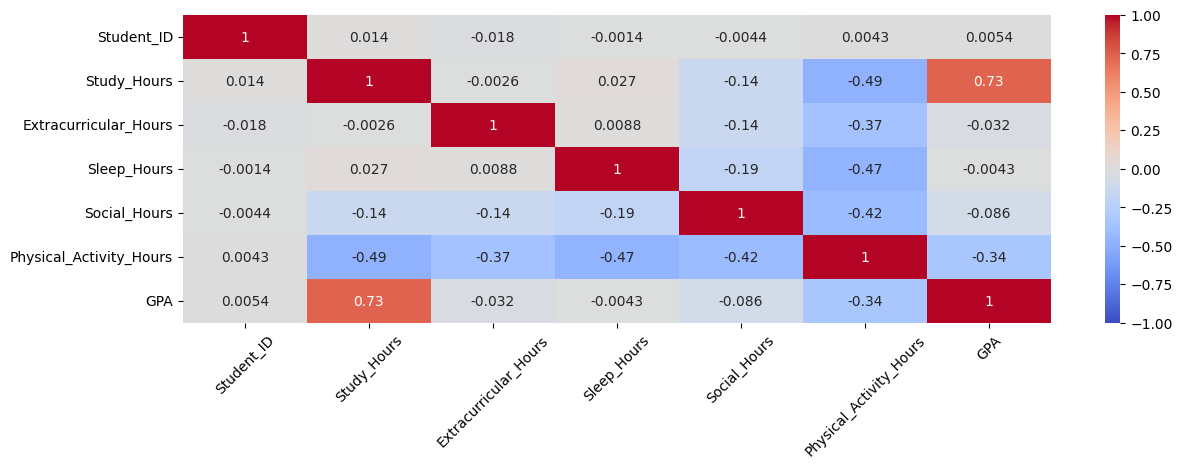

In [23]:
plt.figure(figsize=(14, 4))
sns.heatmap(df.corr(numeric_only=True),
           vmin=-1,
           vmax=1,
           cmap='coolwarm',
           annot=True)
plt.xticks(rotation=45)

In [73]:
top_5_thresh = np.quantile(df['GPA'], 0.95)
bottom_5_thresh = np.quantile(df['GPA'], 0.05)
print(top_5_thresh)
print(bottom_5_thresh)

3.61
2.63


In [74]:
top_5_percent_students = df.loc[df['GPA'] >= top_5_thresh]

In [75]:
bottom_5_percent_students = df.loc[df['GPA'] <= bottom_5_thresh]

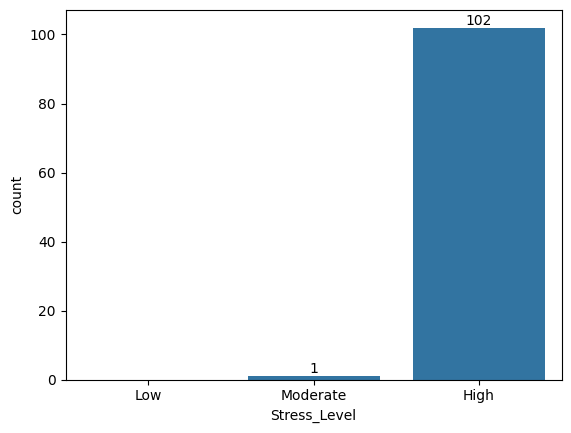

In [76]:
ax= sns.countplot(data=top_5_percent_students, x='Stress_Level')
ax.bar_label(ax.containers[0]);

> We can see here that the top 5% of students (GPA >= 3.61), have high stress levels, with the exception of 1 student with a moderate stress level.  

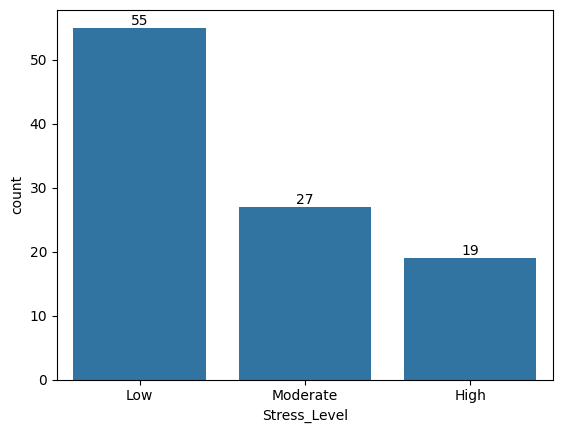

In [77]:
ax= sns.countplot(data=bottom_5_percent_students, x='Stress_Level')
ax.bar_label(ax.containers[0]);

> We can see in this graph of the bottom 5% of students (GPA <= 2.63) that most students have low stress, some with moderate, and some with high. These students with high stress, but poor grades, may be athletes, and are stressed from the sport they play, rather than their school work. 

<Axes: xlabel='Sleep_Hours'>

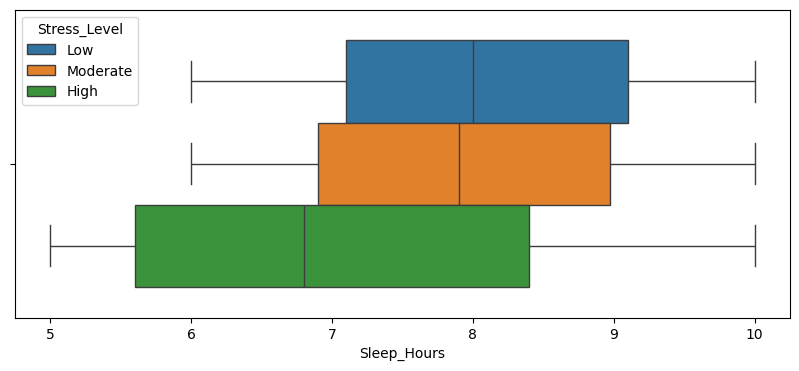

In [49]:
plt.figure(figsize=(10, 4))
sns.boxplot(data=df, x='Sleep_Hours', hue='Stress_Level')

<Axes: xlabel='GPA'>

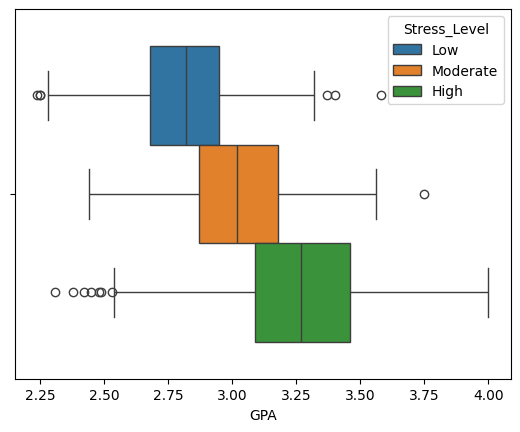

In [53]:
sns.boxplot(data=df, x='GPA', hue='Stress_Level')

In [60]:
df.groupby('Stress_Level', observed=False)['GPA'].agg(['mean', 'median']).round(2)

,mean,median
Stress_Level,,
Low,2.82,2.82
Moderate,3.02,3.02
High,3.26,3.27


<Axes: xlabel='Study_Hours', ylabel='GPA'>

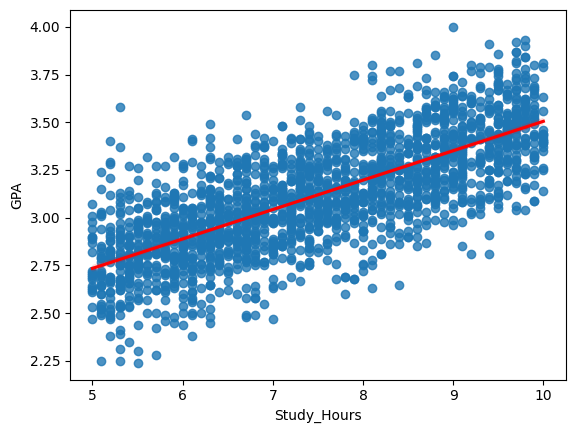

In [24]:
sns.regplot(data=df, x='Study_Hours', y='GPA', line_kws={'color': 'red'})

<Axes: xlabel='Physical_Activity_Hours', ylabel='GPA'>

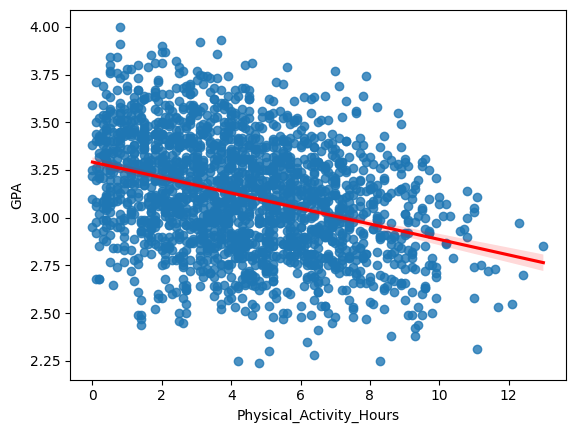

In [25]:
sns.regplot(data=df, x='Physical_Activity_Hours', y='GPA', line_kws={'color': 'red'})

<Axes: xlabel='Study_Hours', ylabel='Physical_Activity_Hours'>

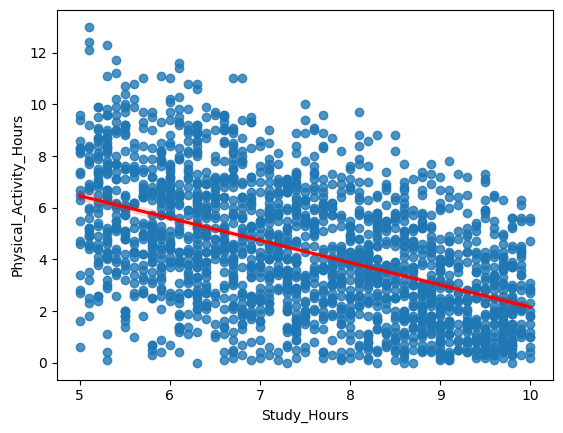

In [27]:
sns.regplot(data=df, x='Study_Hours', y='Physical_Activity_Hours', line_kws={'color': 'red'})

In [ ]:
df.head()